12. Dado el siguiente sistema de  ecuaciaciones diferenciales:
$$ 5x' + 3x + 5y' - 4y = \frac{47}{3} e^{t} + \frac{22}{3}e^{4t} + 16 $$
$$ 3x' + 8x + 3y' + 5y = \frac{164}{3} e^{t} + \frac{29}{6} e^{t} -20 $$

Con las condiciones iniciales: $  x(0)= 2, \ \ y(0) = 1/2 $

Determinar la solución aproximada para $ 0 \leq t \leq 1/20, \ \ \ con \ \ h = 1/80 $

### Solución
Paso 1: Designamos como A y B a las partes que no tienen derivadas en cada ecuación:
$$ \frac{47}{3} e^{t} + \frac{22}{3}e^{4t} + 16 = A $$
$$ \frac{164}{3} e^{t} + \frac{29}{6} e^{t} -20 = B $$

Ocupo operadores diferenciales 
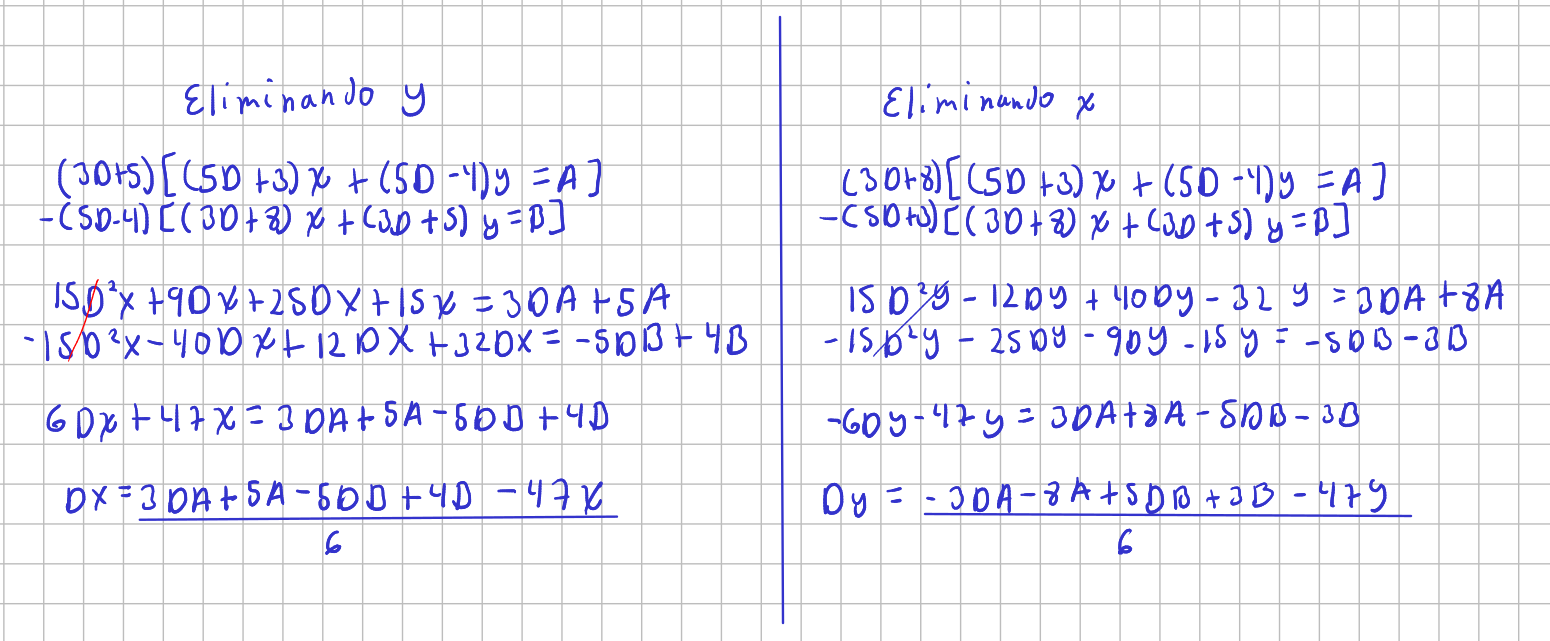

Resuelvo en Python

In [40]:
from sympy import *

# Declaramos las variable a utilizar
x, y, t= symbols("x y t")

h= 1/80

# Ingresamos nuestras funciones A y B
A = (47/3) * exp(t) + (22/3)*exp(4*t)+16
B = (164/3) * exp(t) + (29/6)*exp(4*t)-20

# Ahora pasamos el despeje de Dx y Dy en dos funcios F y G
f = (3*A.diff() + 5*A - 5*B.diff() + 4*B - 47*x) / 6
g = (3 * A.diff() + 8*A - 5 * B.diff() - 3*B + 47*y) / -6

display(f)
display(g)

-47*x/6 + 7.88888888888889*exp(4*t) + 11.7777777777778*exp(t)

-47*y/6 - 5.91666666666667*exp(4*t) + 44.1666666666667*exp(t) - 94/3

In [41]:
from numpy import arange
# creamos nuestro intervalo
T = [round(t, 4) for t in arange(start=0, stop=1/20 + h/2,step=h)]
T

[0.0, 0.0125, 0.025, 0.0375, 0.05]

In [42]:
# Ahora vamos a generar todas nuestras K y T

# Declaro la lista con x(0) = 2, y(0)=0.5

X = [2]
Y = [0.5]
K11 = [0]
K12 = [0]
K21 = [0]
K22 = [0]
K31 = [0]
K32 = [0]
K41 = [0]
K42 = [0]

# Hago un for para aplicar la fórmula
for i in range(1, len(T)):
    k11 = f.subs({t: T[i-1], x: X[i-1]})
    k12 = g.subs({t: T[i-1], y: Y[i-1]})
    k21 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k11*h)/2})
    k22 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k12*h)/2})
    k31 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k21*h)/2})
    k32 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k22*h)/2})
    k41 = f.subs({t: T[i-1] + h, x: X[i-1] + k31*h})
    k42 = g.subs({t: T[i-1] + h, y: Y[i-1] + k32*h})
    K11.append(k11)
    K12.append(k12)
    K21.append(k21)
    K22.append(k22)
    K31.append(k31)
    K32.append(k32)
    K41.append(k41)
    K42.append(k42)
    X.append(float(X[i-1] + (h/6)*(k11+2*k21+2*k31+k41)))
    Y.append(float(Y[i-1] + (h/6)*(k12+2*k22+2*k32+k42)))


display(X)
display(Y)

[2,
 2.0509520218135515,
 2.103867482753009,
 2.158838888226174,
 2.2159633838046844]

[0.5,
 0.537256702487684,
 0.5739901295148819,
 0.6101428428822014,
 0.6456540744570649]

In [43]:
# Desplegamos en una tabla los resultados de las aproximaciones y las K
from utils import imprimir_tabla

# Primero una lista para los datos principales
lista_aproximaciones = [["ti", "Xi", "Yi"]]

for i in range(len(T)):
    lista_aproximaciones.append(
        [
            str(float(T[i])),
            str(float(X[i])),
            str(float(Y[i]))
        ]
    )

# Ahora una lista de las K de x
lista_k1 = [["k11", "k21", "k31", "k41"]]

for i in range(len(T)):
    lista_k1.append(
        [
            str(float(K11[i])),
            str(float(K21[i])),
            str(float(K31[i])),
            str(float(K41[i]))
        ]
    )

# Finalmente una lista de las K de y
lista_k2 = [["k12", "k22", "k32", "k42"]]

for i in range(len(T)):
    lista_k2.append(
        [
            str(float(K12[i])),
            str(float(K22[i])),
            str(float(K32[i])),
            str(float(K42[i]))
        ]
    )

print("Tabla de aproximaciones")
imprimir_tabla(lista_aproximaciones)

print("Tabla de k para x")
imprimir_tabla(lista_k1)

print("Tabla de k para y")
imprimir_tabla(lista_k2)

Tabla de aproximaciones


┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ ti     ┃ Xi                 ┃ Yi                 ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0    │ 2.0                │ 0.5                │
│ 0.0125 │ 2.0509520218135515 │ 0.537256702487684  │
│ 0.025  │ 2.103867482753009  │ 0.5739901295148819 │
│ 0.0375 │ 2.158838888226174  │ 0.6101428428822014 │
│ 0.05   │ 2.2159633838046844 │ 0.6456540744570649 │
└────────┴────────────────────┴────────────────────┘

Tabla de k para x


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ k11                ┃ k21                ┃ k31               ┃ k41               ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 0.0                │ 0.0                │ 0.0               │ 0.0               │
│ 3.9999999999999982 │ 4.077716465514799  │ 4.073911596890635 │ 4.153714345693899 │
│ 4.153494018683286  │ 4.2348637431651035 │ 4.230880017070678 │ 4.314439711784612 │
│ 4.314208936097032  │ 4.399415057343848  │ 4.39524350765781  │ 4.482748561018997 │
│ 4.482506811604029  │ 4.571741804739464  │ 4.567373008200541 │ 4.659021440200949 │
└────────────────────┴────────────────────┴───────────────────┴───────────────────┘

Tabla de k para y


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ k12                ┃ k22                ┃ k32                ┃ k42                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                │ 0.0                │ 0.0                │ 0.0                │
│ 2.9999999999999996 │ 2.980249967063287  │ 2.9812168957591476 │ 2.9602834684434596 │
│ 2.960350119999685  │ 2.9383448862852504 │ 2.93942222585252   │ 2.916160628779772  │
│ 2.9162338766814466 │ 2.891842185819214  │ 2.89303636235101   │ 2.8673114432914897 │
│ 2.8673916657276903 │ 2.840475335075933  │ 2.8417931137640924 │ 2.8134625925267454 │
└────────────────────┴────────────────────┴────────────────────┴────────────────────┘